<h1>Homework 1</h1>

In [263]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
import openml
import pandas as pd
from openml.datasets import edit_dataset, fork_dataset, get_dataset
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import time
from sklearn.metrics import accuracy_score
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_recall_curve
from sklearn import metrics
from prg import prg
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import Ridge

<h2>Problem 1: Linear Separability</h2>

<p>1. This dataset is not linearly separable. From the figure shown below, it is obviously to see that the intersection of the convex hull of these two classes is not empty, so a linear classifier cannot be trained to classify this dataset.</p>

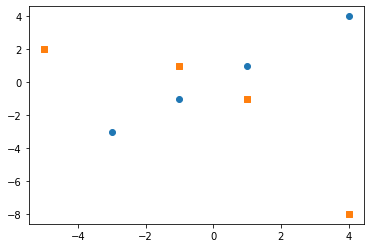

In [4]:
class_1 = plt.scatter([-1, 1, -3, 4], [-1, 1, -3, 4], marker='o')
class_1 = plt.scatter([-1, 1, -5, 4], [1, -1, 2, -8], marker='s')
plt.show()

<p>2. We define the new representation as $z=x_1 * x_2$, then the dataset is linearly separable. $z>0$ belongs to one class, and $z<0$ belongs to the other.</p>

<p>3. The separating hyperplane looks like a point at value 0 on z-axis.</p>

<p>4. Nonlinear transformation can make nonlinearly separable dataset linearly separable and increase the ability of representation of model.</p>

<h2>Problem 2: Bias Variance Tradeoff, Regularization</h2>

<p>1. $E[(f(x)+\epsilon-g(x))^2] = E[(f(x)+\epsilon-g(x) + E[g(x)] - E[g(x)])^2] = E[(f(x)-g(x))^2] + E[\epsilon^2] + E[(E[g(x)]-g(x))^2] + 2E[(f(x)-E[g(x)])\epsilon] + 2E[\epsilon(E(g(x))-f(x))(f(x)-E(g(x))]$
Since $E[f(x)]=f(x), E[\epsilon]=0$, we have $E[(f(x)+\epsilon-g(x))^2] = E[(f(x)-g(x))^2] + E[\epsilon^2] + E[(E[g(x)]-g(x))^2] = Bias^2 + Noise + Variance$

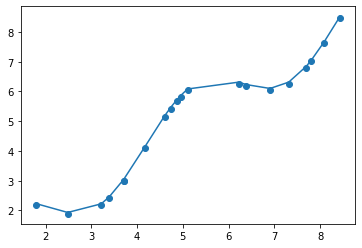

In [247]:
# 2.
x = np.sort(np.random.rand(20) * 10)
yx = x + np.sin(1.5 * x) + np.random.normal(0, np.sqrt(0.3))
fx = x + np.sin(1.5 * x)
plt.scatter(x, yx)
plt.plot(x, fx)
plt.show()

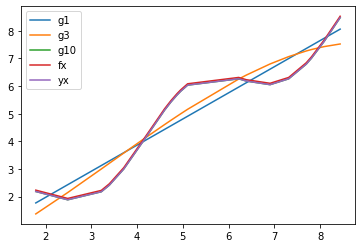

In [248]:
# 3.
f_1 = np.polyfit(x, yx, 1)
f_3 = np.polyfit(x, yx, 3)
f_10 = np.polyfit(x, yx, 10)

g_1 = np.polyval(f_1, x)
g_3 = np.polyval(f_3, x)
g_10 = np.polyval(f_10, x)

plt.plot(x, g_1, label='g1')
plt.plot(x, g_3, label='g3')
plt.plot(x, g_10, label='g10')
plt.plot(x, fx, label='fx')
plt.plot(x, yx, label='yx')
plt.legend()
plt.show()

<p>From the figure, we can know that $g_1(x)$ is underfitting, and $g_{10}(x)$ is overfitting.

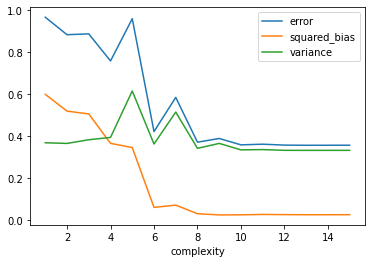

In [277]:
# 4.
squared_bias = np.zeros(15)
variance = np.zeros(15)
errors = np.zeros(15)

test_errors = [[] for _ in range(15)]
pred_test = [[] for _ in range(15)]

test_x = np.sort(np.random.rand(10) * 10)
test_y = test_x + np.sin(1.5 * test_x) + np.random.normal(0, np.sqrt(0.3))
total_train_x = []
total_train_y = []

for i in range(100):
    train_x = np.sort(np.random.rand(40) * 10)
    total_train_x.append(train_x)
    train_y = train_x + np.sin(1.5 * train_x) + np.random.normal(0, np.sqrt(0.3))
    total_train_y.append(train_y)
    for j in range(15):
        f = np.polyfit(train_x, train_y, j+1)
        predict_y = np.polyval(f, test_x)
        pred_test[j].append(predict_y)
        test_errors[j].append(mean_squared_error(test_y, predict_y))

for i in range(15):
    errors[i] = np.mean(test_errors[i])
    squared_bias[i] = mean_squared_error(np.array(pred_test[i]).mean(0), test_y)
    variance[i] = np.mean((np.array(pred_test[i]) - np.array(pred_test[i]).mean(0)) ** 2)

plt.plot([i for i in range(1, 16)], errors, label='error')
plt.plot([i for i in range(1, 16)], squared_bias, label='squared_bias')
plt.plot([i for i in range(1, 16)], variance, label='variance')
plt.xlabel('complexity')
plt.legend()
plt.show()

<p> From the figure above, we can see the $g_{8}(x)$ is the best model.</p>

In [293]:
# 5.
mse_list = []
pre_test = []
p_x = PolynomialFeatures(degree = 10).fit_transform(test_x.reshape(10, 1))
for i in range(100):
    t_x = PolynomialFeatures(degree = 10).fit_transform(total_train_x[i].reshape(40, 1))
    clf = Ridge()
    clf.fit(t_x, total_train_y[i])
    pred_y = clf.predict(p_x)
    pre_test.append(pred_y)
    mse_list.append(mean_squared_error(test_y, pred_y))

mse = np.mean(mse_list)
biass = mean_squared_error(np.array(pre_test).mean(0), test_y)
varriance = np.mean((np.array(pre_test) - np.array(pre_test).mean(0)) ** 2)

print('MSE before L2: ' + str(errors[9]) + ', ' + 'L2: ' + str(mse))
print('bias before L2: ' + str(squared_bias[9]) + ', ' + 'L2: ' + str(biass))
print('variance before L2: ' + str(variance[9]) + ', ' + 'L2: ' + str(varriance))

MSE before L2: 0.3577210484025734, L2: 0.9419139582460204
bias before L2: 0.02395324667130525, L2: 0.057079328763141854
variance before L2: 0.3337678017312681, L2: 0.8848346294828784


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/linear_model/_ridge.py:212: LinAlgWarning: Ill-conditioned matrix (rcond=5.37475e-21): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/linear_model/_ridge.py:212: LinAlgWarning: Ill-conditioned matrix (rcond=4.22566e-21): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/linear_model/_ridge.py:212: LinAlgWarning: Ill-conditioned matrix (rcond=1.92704e-20): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/linear_model/_ridge.py:212: LinAlgWarning: Ill-conditioned matrix (rcond=7.81545e-21): result may not be accurate.
 

<p> It shows that the bias, variance and MSE of L2 regularization model all increase when compared to the unregularized one, because regularization is equivalent to adding noise to the model to increase the ability of generalization of model, so the bias would incerase after regularization. </p>

<h2> Problem 3: OpenML, Algorithmic Performance Scaling</h2>

1. The first dataset is [credit-g](https://www.openml.org/search?type=data&sort=runs&status=active&qualities.NumberOfClasses=%3D_2&id=31). The number of features in this dataset is 21, the number of instances is 1000, the number of classes is 2, the number of numerical features is 7, the number of categorical features is 14. The second dataset is [one-hundred-plants-margin](https://www.openml.org/search?type=data&sort=runs&status=active&qualities.NumberOfClasses=gte_2&id=1491). The number of features in this dataset is 65, the number of instances is 1600, the number of classes is 100, the number of numerical features is 64, the number of categorical features is 1.

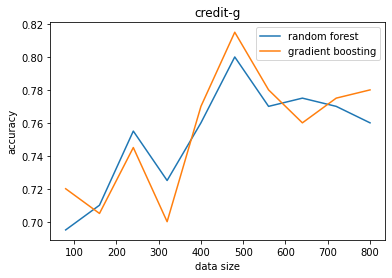

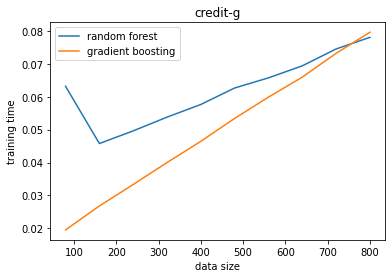

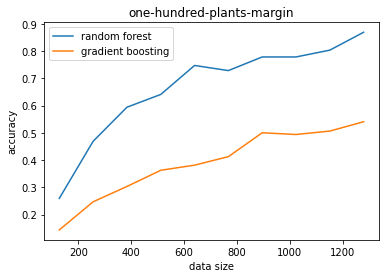

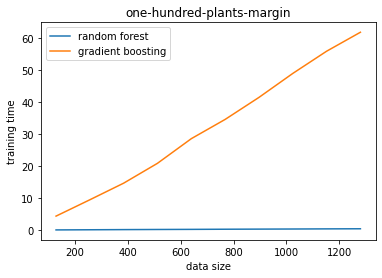

In [68]:
# 2.
creditg = openml.datasets.get_dataset(31)
ohpm = openml.datasets.get_dataset(1491)
dataset = [creditg, ohpm]
count = 1
for s in dataset:
    X, y, categorical_indicator, attribute_names = s.get_data(dataset_format="array", target=s.default_target_attribute)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
    data_size = []
    rf_acc = []
    gb_acc = []
    rf_time = []
    gb_time = []
    for i in range(1, 11):
        if i != 10:
            X_subtrain, _, y_subtrain, _ = train_test_split(X_train, y_train, train_size=float(i/10))
        else:
            X_subtrain, y_subtrain = X_train, y_train
        data_size.append(X_subtrain.shape[0])
        rf = RandomForestClassifier()
        t1 = time.time()
        rf.fit(X_subtrain, y_subtrain)
        t2 = time.time()
        rf_time.append(t2-t1)
        rf_predicted = rf.predict(X_test)
        rf_acc.append(accuracy_score(y_test, rf_predicted))
        gb = GradientBoostingClassifier()
        t1 = time.time()
        gb.fit(X_subtrain, y_subtrain)
        t2 = time.time()
        gb_time.append(t2-t1)
        gb_predicted = gb.predict(X_test)
        gb_acc.append(accuracy_score(y_test, gb_predicted))
    plt.figure(count)
    plt.plot(data_size, rf_acc, label='random forest')
    plt.plot(data_size, gb_acc, label='gradient boosting')
    plt.legend()
    plt.xlabel('data size')
    plt.ylabel('accuracy')
    plt.title(s.name)
    count += 1
    plt.figure(count)
    plt.plot(data_size, rf_time, label='random forest')
    plt.plot(data_size, gb_time, label='gradient boosting')
    plt.legend()
    plt.xlabel('data size')
    plt.ylabel('training time')
    plt.title(s.name)
    count += 1
plt.show()

<p>3. From two figures in part 2, we can see there has not scaling of accuracy in dataset 1 for both classifier, as well as not scaling of training time in dataset 2 for random forest. Observation (1): In dataset 1, the performance of these two classifiers are similar, but when the size of training data is relatively small, the time needed to train for gradient boosting is less than random forest. Observation (2): In dataset 2, the performance of random forest is much better than gradient boosting since random forest gives better accuracy and less training time. Observation (3): Different types of dataset, or even the choice of hyperparameters, would affect the performance of algorithms.</p>

<h2>Problem 4: Precision, Recall, ROC</h2>

<p>1. True negative matters for ROC curve but not PR curve. Each point on ROC curve corresponds to a unique point on PR curve because they all have a one-to-one mapping between confusion matrices and points in their space. Trivially, a point in ROC space defines a unique confusion matrix, and although PR curse does not consider TN, but if recall is not 0, we can still define a unique confusion matrix based on the other three entries.</p>

2. In this part, we will still use dataset [blood-transfusion-service-center](https://www.openml.org/search?type=data&sort=runs&status=active&id=1464), and split the dataset based on 80/20.

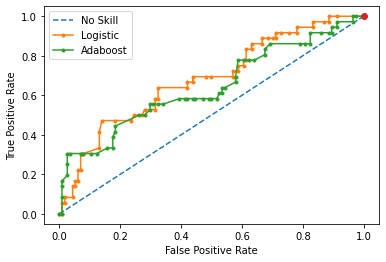

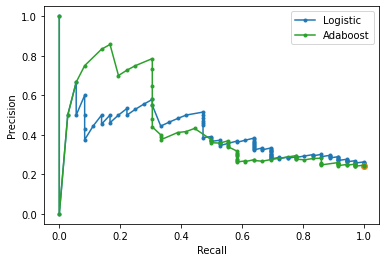

In [101]:
btsc = openml.datasets.get_dataset(1464)
X, y, categorical_indicator, attribute_names = btsc.get_data(dataset_format="array", target=btsc.default_target_attribute)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
ns_probs = [0 for _ in range(len(y_test))]
lr = LogisticRegression()
lr.fit(X_train, y_train)
lr_probs = lr.predict_proba(X_test)
lr_probs = lr_probs[:, 1]
ns_auc = roc_auc_score(y_test, ns_probs)
lr_auc = roc_auc_score(y_test, lr_probs)
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)
lr_precision, lr_recall, _ = precision_recall_curve(y_test, lr_probs)
ab = AdaBoostClassifier()
ab.fit(X_train, y_train)
ab_probs = ab.predict_proba(X_test)
ab_probs = ab_probs[:, 1]
ab_auc = roc_auc_score(y_test, ab_probs)
ab_fpr, ab_tpr, _ = roc_curve(y_test, ab_probs)
ab_precision, ab_recall, _ = precision_recall_curve(y_test, ab_probs)

plt.figure(1)
plt.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
plt.plot(lr_fpr, lr_tpr, marker='.', label='Logistic')
plt.plot(ab_fpr, ab_tpr, marker='.', label='Adaboost')
plt.plot([1], [1], marker='o')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.figure(2)
plt.plot(lr_recall, lr_precision, marker='.', label='Logistic')
plt.plot([lr_recall[0]], [lr_precision[0]], marker='o')
plt.plot(ab_recall, ab_precision, marker='.', label='Adaboost')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend()
plt.show()

<p> The point in red in the above figures shows where all positive classifier lies in the ROC and PR curves.</p>

In [115]:
# 3.
print('AUROC in Logistic Regression:' + str(metrics.auc(lr_fpr, lr_tpr)))
print('AUROC in Adaboost:' + str(metrics.auc(ab_fpr, ab_tpr)))
print('AUPR in Logistic Regression:' + str(metrics.auc(lr_recall, lr_precision)))
print('AUPR in Adaboost:' + str(metrics.auc(ab_recall, ab_precision)))
lr_prg_curve = prg.create_prg_curve(y_test, lr_probs)
ab_prg_curve = prg.create_prg_curve(y_test, ab_probs)
print('AUPRG in Logistic Regression:' + str(prg.calc_auprg(lr_prg_curve)))
print('AUPRG in Adaboost:' + str(prg.calc_auprg(ab_prg_curve)))

AUROC in Logistic Regression:0.682261208576998
AUROC in Adaboost:0.6438840155945418
AUPR in Logistic Regression:0.39679640063653066
AUPR in Adaboost:0.43477712116282546
AUPRG in Logistic Regression:0.5733560765935352
AUPRG in Adaboost:0.5403233518778353


<p> I agree with the conclusion because PR gain curves combine the advantages of ROC and PR curve, and PR gain calculates the harmonic mean. </p>